## Introduction to Machine Learning with Computer Vision Problems

### ML(Machine Learning)의 "간단한" 소개
위키백과에선 ML을 이렇게 정의하죠.
>기계 학습(機械學習) 또는 머신 러닝(영어: machine learning)은 인공 지능의 한 분야로, 컴퓨터가 학습할 수 있도록 하는 알고리즘과 기술을 개발하는 분야를 말한다.

위 말 해석 그대로 머신러닝은 컴퓨터가 스스로 학습하도록 만드는 기술입니다. 어떤 인풋이 들어가면 컴퓨터는 그 인풋을 미리 만들어놓은 알고리즘을 통해서 결과를 내놓는데, 이 중간 알고리즘을 처음부터 픽스해놓는 것이 아닌, 인풋으로 들어오는 데이터에 따라 자신을 바꾸어나갈 수 있도록 하는 것이 바로 '머신러닝'입니다. 우리가 흔히 접할 수 있는 유튜브 추천 알고리즘 <del>알수없는 유튜브 추천 알고리즘이 날 여기로 인도했다</del>, 2016년에 굉장히 핫했던 알파고(AlphaGo), Tesla가 자사의 전기차에 기능으로 제공하는 자율주행 'Autopilot' 모두 주변의 환경을 ML에 집어넣어서 학습을 하죠. (참고로, 여러분이 주변에서 들으셨을 '딥 러닝: Deep Learning' 또한 ML에 속합니다! Deep Learning은 컴퓨팅 파워가 좋아짐에 따라 복잡한 모델을 컴퓨터에 돌릴 수 있게 되어 생겨난 용어죠.) 

오늘은 이 ML에 대해서 한번 간단히 알아보고, 직접 만들어보는 시간을 가져볼 것입니다.

### 1. Linear Regression

ML강의를 들으셨던 분들은 아시겠지만, 항상 ML을 시작할때마다 처음 보이는 파트는 바로 'Linear Regression'입니다. Linear Regression을 해석하면 '선형 회귀'인데, 이 말을 처음 들으시면 무슨 말인지 이해가 어려울 것입니다. 하지만, excel을 써보신 분들은 아시겠죠. '추세선'이라는 기능은 데이터의 추세를 그래프에 띄워주는 기능인데, Linear Regression은 바로 이 추세선을 찾아내는 것을 목적으로 합니다! 예를 들어, 물리학에서 반지름에 따른 관성모멘트의 크기를 실험하고자 할 때, 반지름 r를 x축에 넣고 관성모멘트의 크기를 y축에 넣어서 y=ax^2라는 식을 만들어놓고 a값을 찾아내죠! 이 a값을 찾아내는 알고리즘이 바로 Linear Regression입니다.


자 그럼 긴 설명 없이 코드를 차근차근 따라가면서 Linear Regression이 뭔지 한번 알아보겠습니다!

In [156]:
# 필요한 패키지 (인생을 편하게 해주는 미리 만들어놓은 프로그램이라고 보면 된다) 를 설치시킨다
!cat requirements.txt
!echo '\n위는 우리가 오늘 사용해볼 패키지들 목록입니다!'
!echo '----------------------------------'
!pip install -r requirements.txt
!echo '\n----------------------------------'

numpy
pandas
matplotlib
torch
torchvision
위는 우리가 오늘 사용해볼 패키지들 목록입니다!
----------------------------------

----------------------------------


### 데이터의 준비

자, 그럼 Linear Regression 구현에 앞서, 우리가 사용할 데이터를 찾아봐야겠죠?  
실제 데이터를 바탕으로 하기 전, 한번 간단한 식을 세워서 그 식을 학습해보도록 해요.  
y=3x+4 라는 식을 한번 컴퓨터가 알아맞춰보도록 해볼게요.  
위에서부터 순차적으로 코드를 실행해주세요.

In [157]:
# 먼저 matplotlib 이라는 visualization 라이브러리를 import 해볼게요.
import matplotlib.pyplot as plt
%matplotlib inline

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[4, 7, 10, 13, 16, 19, 22, 25, 28, 31]


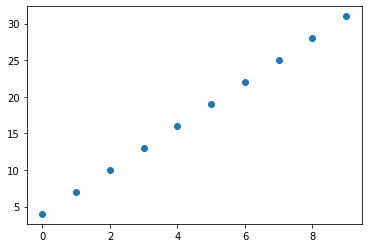

In [216]:
def f(x): return 3 * x + 4 # 3x+4라는 함수를 한번 세워보았어요.
x = [ i for i in range(0,10)] # x값은 0부터 10까지로 설정해볼게요.
y = [ f(i) for i in x]
print(x)
print(y)
plt.scatter(x,y) # 그래프를 그려봐요!

In [218]:
import torch # 우리가 Linear Regression 구현을 편하게 할 수 있도록 도와줄 'PyTorch'라는 라이브러리를 import 해볼게요.
import torch.nn as nn

newx = [ [i] for i in range(0,10)] # x값은 0부터 10까지로 설정해볼게요.
newy = [ [f(i)] for i in x]

x_data = torch.Tensor(newx) # torch에서 사용되는 '텐서'로 바꾸어볼게요. 텐서는 벡터, 행렬들을 통틀어 일컫는 말입니다.
y_data = torch.Tensor(newy)

자, 데이터는 준비되었으니, 이 데이터를 표현할 모델이 필요해요.  
우리는 방금전에 'y=3x+4'라는 식을 바탕으로 만들었죠?
그러면 우리는 이 식을 알아맞추기 위해서 하나의 가설을 세워야 해요. 다음과 같이 표현해보죠.  

$$y = {ax + b}$$

이 식을 우리 모델의 '가설(Hypothesis)'이라 부릅니다. 이제, 이 가설을 바탕으로 모델을 구성해 볼게요.  
pytorch에서는 이 모델을 간단히 구현할 수 있도록 도와줍니다. `nn.Linear` 에서는 이 가설을 이용해서 자동으로 'y=wx+b'라는 식을 만들어줍니다.

In [257]:
class LinearRegression(nn.Module): # nn.Module를 상속받으면 우리는 쉽게 ML 모델을 만들 수 있습니다!
    # 생성자에 우리가 사용할 변수들을 선언해주도록 해볼게요.
    def __init__(self):
        # 모델을 정상적으로 초기화해주기 위해서는, 부모의 생성자를 호출해야 합니다.
        super(LinearRegression, self).__init__()
        
        # nn.Linear 안의 매개변수는 input의 개수와 output의 개수를 나타내줍니다.
        # 우리는 y=ax+b라는 식을 위해 인풋 1개 아웃풋 1개인 모델을 만들어 보았어요.
        self.linear = nn.Linear(1, 1)
    
    # forward 함수는 모델을 통해 예측을 수행할 때 필요로 합니다. 한마디로, 데이터를 이 함수로 흘려보내는거죠.
    def forward(self, x):
        out = self.linear(x) # y = wx + b에서 인풋은 x가 되겠죠? 아까 만든 linear모델에 집어넣읍시다.
        return out # 위 linear 모델의 출력값을 반환합시다.
    
model = LinearRegression()

축하해요! 첫 모델을 만들었네요.  
그럼 모델과 데이터가 준비되었으니, 본격적으로 학습을 진행해볼게요.  


### 학습

학습을 위해서는 우선 실제 값과 모델을 통해 예측한 값을 비교해 보아야겠지요?  
이를 도와주는 것이 바로 오차 함수(loss function) 입니다.  
오차 함수는 실제 데이터와 모델 예측 데이터와의 차이를 계산해주는 함수입니다.  

Linear Regression 문제에서는 오차함수로 다음과 같은 함수를 사용합니다.

$$E = {{1 \over 2}{\sum_{k=1}^N (y_k - t_k)^2}}$$  

무슨 식인가 싶겠지만, 사실 간단합니다.  
이 식의 이름은 MSE(Mean Squared Error : 평균 제곱 오차) 라고 부릅니다.  
선형 대수학에서는 '최소 자승법'이라고 불리는 데에서 주로 사용되죠.  
모델이 예측한 y값들과 실제 값들 t와의 차이를 계산해 모두 합한 식이 바로 이 MSE가 되는 것입니다.  
만약 모델이 실제 데이터의 식을 잘 예측했다면 이 식의 결과값은 0에 가까이 수렴하겠죠?  

Linear Regression에서 학습의 의미는 바로 여기에 있습니다.  
모델이 '학습'한다는 것은 결국에는 이 loss function을 0에 가깝도록 만든다는 것과 같은 말입니다.  
MSE는 PyTorch를 이용한다면 다음과 같이 코드 한줄로 불러올 수 있습니다.  

In [258]:
criterion = nn.MSELoss() # criterion은 '판별식'의 의미를 가지고 있습니다. 모델이 제대로 학습하고 있는 지표를 보여준다는 의미를 가지고 있죠.

자, 그러면 어떻게 이 MSE loss function을 0에 가깝도록 만들까요?  
사람도 못하지만, 컴퓨터 역시 저 식을 최소로 만드는 값을 한번에 찾기는 어렵습니다.  
그래서, 이 loss function의 값을 0으로 만드는 '최적화' 알고리즘을 쓸 필요가 있습니다.  

여기서, Linear Regression의 핵심 개념이 나옵니다.  
바로 'Gradient Descent'입니다. 해석하면 '기울기 하강법 / 경사 하강법'이 되겠네요.  
말 뜻과 같이 기울기를 계산해서 감소시키는 것이 이 알고리즘입니다.  

그럼 무슨 기울기를 구해야 하는 것일까요?  
바로, 아까 정의한 loss function의 기울기 입니다.  
앞서 정의한 가설을 다시 불러와볼게요. (설명을 위해 기울기는 w, 그 외 bias는 등 b라 정의할게요.)

$$y = {wx + b}$$  

여기서, y는 w와 b에 대한 함수라는 것을 알 수 있습니다! (같은 x가 들어올 때 w와 b에 따라서 오차가 달라지니까요 :D)  
그럼, loss function은 y에 대한 함수이니까, 결국 w와 b에 대한 함수이기도 하겠죠.  
자세한 내용은 방학때 다루고, 쉬운 이해를 위해 w와 b에 따른 loss function을 그래프로 그려볼게요.

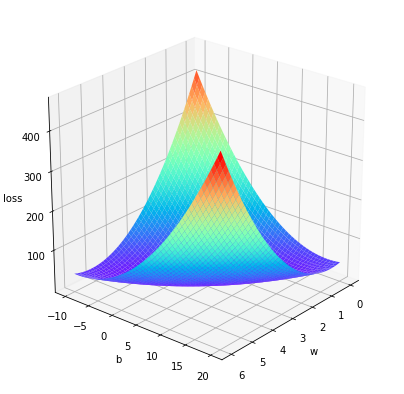

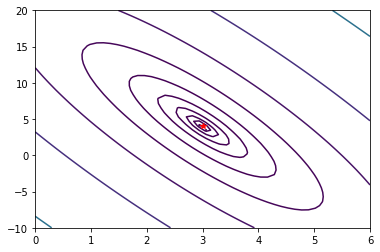

In [259]:
def MSE(w, b): # MSE 식을 직접 구해볼게요.
    loss = 0
    for xs in x:
        loss += 0.5*(w*xs+b - f(xs))**2
    loss/=len(x) # 값이 너무 커지니까 평균을 구해볼게요.
    return loss  

Xs, Ys = np.meshgrid(np.linspace(0, 6, 50), np.linspace(-10, 20, 50))
Zs = np.array([MSE(t0, t1) for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = np.reshape(Zs, Xs.shape) # w, b, mse값 데이터를 만드는 과정입니다.

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d")
ax.set_xlabel(r'w')
ax.set_ylabel(r'b')
ax.set_zlabel(r'loss')
ax.view_init(elev=25, azim=40)
ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)

w_optimal = 3
b_optimal = 4 # 최적값은 아까 y=3x+4니까 w는 3, b는 4겠죠?

ax = plt.figure().gca()
ax.plot(w_optimal, b_optimal, 'r*')
plt.contour(Xs, Ys, Zs, np.logspace(-3, 3, 15))

저 무지개색 그래프 꼭대기에서 공을 굴린다고 생각해 볼게요.  
그러면 공은 그 기울기 방향으로 굴러가서 결국에는 아래 그래프에 보이는 빨간 점에 도달하겠죠?  
경사 하강법은 저 각각 지점에서의 기울기를 구하여서 공이 굴러떨어지듯이 기울기가 감소하는 방향으로 w와 b를 바꿉니다.  
너무 빨리 값을 바꾸면 공이 너무 빠르게 움직여서 저 최솟값에는 도달하지 못하겠죠?  
그래서 우리는 기울기값에 일정 값인 Learning rate(lr)을 곱해서 w와 b를 업데이트합니다!  

PyTorch에서는 Gradient Descent를 다음 한줄로 불러올 수 있습니다!

In [260]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

그럼 본격적으로 학습을 시작해봅시다.
학습 전에는 그래프가 이렇게 그려져요.

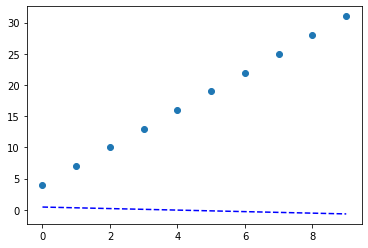

In [262]:
def display_results(model, x, y): # 그래프 그려주는 함수
    prediction = model(x)
    loss = criterion(input=prediction, target=y)
    
    plt.clf()
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'b--')
    plt.show()
    
display_results(model, x_data, y_data)

In [263]:
total_epoch = 1001 # 총 1001번 학습을 진행한다는 의미입니다. epoch는 에폭시라 읽으며, 반복 횟수를 의미합니다.
for epoch in range(total_epoch):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%30==0:
        print("epoch : {} loss : {}".format(epoch, loss.item()))
        

epoch : 0 loss : 390.30645751953125
epoch : 30 loss : 1.8299204111099243
epoch : 60 loss : 1.3027479648590088
epoch : 90 loss : 0.9274458885192871
epoch : 120 loss : 0.6602616906166077
epoch : 150 loss : 0.47005051374435425
epoch : 180 loss : 0.33463576436042786
epoch : 210 loss : 0.23823241889476776
epoch : 240 loss : 0.169601172208786
epoch : 270 loss : 0.12074162811040878
epoch : 300 loss : 0.08595774322748184
epoch : 330 loss : 0.06119456887245178
epoch : 360 loss : 0.04356534779071808
epoch : 390 loss : 0.03101482428610325
epoch : 420 loss : 0.02207989990711212
epoch : 450 loss : 0.015719056129455566
epoch : 480 loss : 0.011190667748451233
epoch : 510 loss : 0.007966848090291023
epoch : 540 loss : 0.005671720020473003
epoch : 570 loss : 0.004037789069116116
epoch : 600 loss : 0.002874575788155198
epoch : 630 loss : 0.002046425361186266
epoch : 660 loss : 0.0014568931655958295
epoch : 690 loss : 0.0010371662210673094
epoch : 720 loss : 0.0007383514894172549
epoch : 750 loss : 0.000

학습 후에는 이렇게 그려지네요.

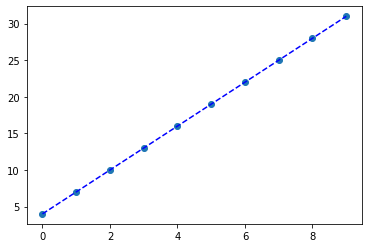

In [264]:
display_results(model, x_data, y_data)

이로써 Linear Regression을 배워보았습니다!